# Grok Trending銘柄 バックテスト分析
## 日付別・Top5別パフォーマンス可視化

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import numpy as np
from IPython.display import display, HTML

# 日本語フォント設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meirio', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 表示設定
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

## 1. データ読み込み

**Phase1 (前場戦略)**: 寄付買い→前場引け売り  
**Phase2 (大引け戦略)**: 寄付買い→大引け売り  
**Phase3 (利確損切り)**: 寄付買い→1%/2%/3%利確 or 3%損切り or 大引け売り

In [217]:
# バックテストファイルのパス
data_dir = Path('data/test_output')

files = [
    ('2025-10-29 16:00', data_dir / 'test_backtest_20251029.parquet'),
    ('2025-10-29 23:00', data_dir / 'test_backtest_202510292300.parquet'),
    ('2025-10-30 16:00', data_dir / 'test_backtest_20251030.parquet'),
    ('2025-10-30 23:00', data_dir / 'test_backtest_202510302300.parquet'),
]

# 全データを読み込み
all_data = []
for label, file_path in files:
    if file_path.exists():
        df = pd.read_parquet(file_path)
        df['selection_datetime'] = label
        all_data.append(df)
        print(f"✅ {label}: {len(df)}銘柄")
    else:
        print(f"❌ {label}: ファイルなし")

# 統合
df_all = pd.concat(all_data, ignore_index=True)

# selection_scoreでランキング付け（各日付内で）
df_all['rank'] = df_all.groupby('selection_datetime')['selection_score'].rank(ascending=False, method='first').astype(int)
df_all['is_top5'] = df_all['rank'] <= 5

print(f"\n📊 合計: {len(df_all)}銘柄")
display(df_all.head())

✅ 2025-10-29 16:00: 10銘柄
✅ 2025-10-29 23:00: 13銘柄
✅ 2025-10-30 16:00: 6銘柄
✅ 2025-10-30 23:00: 12銘柄

📊 合計: 41銘柄


,selection_date,backtest_date,ticker,company_name,category,reason,grok_rank,selection_score,buy_price,sell_price,daily_close,high,low,volume,phase1_return,phase1_win,profit_per_100_shares_phase1,phase2_return,phase2_win,profit_per_100_shares_phase2,phase3_1pct_return,phase3_1pct_win,phase3_1pct_exit_reason,profit_per_100_shares_phase3_1pct,phase3_2pct_return,phase3_2pct_win,phase3_2pct_exit_reason,profit_per_100_shares_phase3_2pct,phase3_3pct_return,phase3_3pct_win,phase3_3pct_exit_reason,profit_per_100_shares_phase3_3pct,prompt_version,data_source,selection_datetime,rank,is_top5
0,2025-10-29,2025-10-30,429A.T,半導体関連銘柄例,,[web_search: kabutan.jp]半導体関連テーマ、2025年10月28日後注...,1,110.0,3225.0,3170.0,3100.0,3310.0,3150.0,785100,-0.017054,False,-5500.0,-0.038760,False,-12500.0,0.010000,True,profit_take_1.0%,3225.0,0.020000,True,profit_take_2.0%,6450.0,-0.030000,False,loss_cut_3.0%,-9675.0,v1_1_web_search,5min,2025-10-29 16:00,1,True
1,2025-10-29,2025-10-30,5268.T,旭コンクリート工業,,[web_search: Yahoo!ファイナンス]下水道・無電柱化テーマ材料、2025年1...,2,102.0,799.0,782.0,792.0,799.0,776.0,32300,-0.021277,False,-1700.0,-0.008761,False,-700.0,-0.008761,False,eod_close,-700.0,-0.008761,False,eod_close,-700.0,-0.008761,False,eod_close,-700.0,v1_1_web_search,5min,2025-10-29 16:00,2,True
2,2025-10-29,2025-10-30,4418.T,JDSC,,[web_search: kabutan.jp]2025年10月28日後AI＆デジタルコンサ...,3,100.0,1489.0,1511.0,1425.0,1549.0,1450.0,330900,0.014775,True,2200.0,-0.042982,False,-6400.0,0.010000,True,profit_take_1.0%,1489.0,0.020000,True,profit_take_2.0%,2978.0,0.030000,True,profit_take_3.0%,4467.0,v1_1_web_search,5min,2025-10-29 16:00,3,True
3,2025-10-29,2025-10-30,340A.T,ジグザグ,,[web_search: Yahoo!ファイナンス]2025年10月28日後決算短信、売上高...,4,95.0,363.0,358.0,356.0,372.0,355.0,70600,-0.013774,False,-500.0,-0.019284,False,-700.0,0.010000,True,profit_take_1.0%,363.0,0.020000,True,profit_take_2.0%,726.0,-0.030000,False,loss_cut_3.0%,-1089.0,v1_1_web_search,5min,2025-10-29 16:00,4,True
4,2025-10-29,2025-10-30,350A.T,デジタルグリッド,,[web_search: fisco.jp]東証グロース、電力取引プラットフォーム開発。[w...,5,88.0,NaN,896.0,861.0,945.0,896.0,257100,NaN,False,NaN,NaN,False,NaN,NaN,False,eod_close,NaN,NaN,False,eod_close,NaN,NaN,False,eod_close,NaN,v1_1_web_search,5min,2025-10-29 16:00,5,True


## 2. 日付別サマリー

In [218]:
# 日付別集計 (Phase1 + Phase2 + Phase3)
summary_by_date = df_all.groupby('selection_datetime').agg({
    'ticker': 'count',
    'phase1_win': 'mean',
    'phase1_return': 'mean',
    'phase2_win': 'mean',
    'phase2_return': 'mean',
    'phase3_1pct_win': 'mean',
    'phase3_1pct_return': 'mean',
    'phase3_2pct_win': 'mean',
    'phase3_2pct_return': 'mean',
    'phase3_3pct_win': 'mean',
    'phase3_3pct_return': 'mean',
}).rename(columns={
    'ticker': '銘柄数',
    'phase1_win': 'P1勝率',
    'phase1_return': 'P1平均',
    'phase2_win': 'P2勝率',
    'phase2_return': 'P2平均',
    'phase3_1pct_win': 'P3-1%勝率',
    'phase3_1pct_return': 'P3-1%平均',
    'phase3_2pct_win': 'P3-2%勝率',
    'phase3_2pct_return': 'P3-2%平均',
    'phase3_3pct_win': 'P3-3%勝率',
    'phase3_3pct_return': 'P3-3%平均',
})

summary_by_date['P1勝率'] = (summary_by_date['P1勝率'] * 100).round(1)
summary_by_date['P1平均'] = (summary_by_date['P1平均'] * 100).round(2)
summary_by_date['P2勝率'] = (summary_by_date['P2勝率'] * 100).round(1)
summary_by_date['P2平均'] = (summary_by_date['P2平均'] * 100).round(2)
summary_by_date['P3-1%勝率'] = (summary_by_date['P3-1%勝率'] * 100).round(1)
summary_by_date['P3-1%平均'] = (summary_by_date['P3-1%平均'] * 100).round(2)
summary_by_date['P3-2%勝率'] = (summary_by_date['P3-2%勝率'] * 100).round(1)
summary_by_date['P3-2%平均'] = (summary_by_date['P3-2%平均'] * 100).round(2)
summary_by_date['P3-3%勝率'] = (summary_by_date['P3-3%勝率'] * 100).round(1)
summary_by_date['P3-3%平均'] = (summary_by_date['P3-3%平均'] * 100).round(2)

print("\n📅 日付別パフォーマンス (All Phases)")
print("=" * 80)
display(summary_by_date.style.format({
    'P1勝率': '{:.1f}%',
    'P1平均': '{:+.2f}%',
    'P2勝率': '{:.1f}%',
    'P2平均': '{:+.2f}%',
    'P3-1%勝率': '{:.1f}%',
    'P3-1%平均': '{:+.2f}%',
    'P3-2%勝率': '{:.1f}%',
    'P3-2%平均': '{:+.2f}%',
    'P3-3%勝率': '{:.1f}%',
    'P3-3%平均': '{:+.2f}%',
}).background_gradient(cmap='RdYlGn', subset=['P1勝率', 'P1平均', 'P2勝率', 'P2平均', 'P3-1%勝率', 'P3-1%平均', 'P3-2%勝率', 'P3-2%平均', 'P3-3%勝率', 'P3-3%平均']))


📅 日付別パフォーマンス (All Phases)


,銘柄数,P1勝率,P1平均,P2勝率,P2平均,P3-1%勝率,P3-1%平均,P3-2%勝率,P3-2%平均,P3-3%勝率,P3-3%平均
selection_datetime,,,,,,,,,,,
2025-10-29 16:00,10,40.0%,-0.26%,40.0%,-0.51%,70.0%,+0.29%,70.0%,+0.89%,50.0%,-0.03%
2025-10-29 23:00,13,38.5%,-3.40%,46.2%,-1.50%,69.2%,-0.08%,53.8%,-0.24%,46.2%,-0.24%
2025-10-30 16:00,6,50.0%,-0.51%,16.7%,-1.62%,50.0%,-0.63%,16.7%,-1.46%,16.7%,-1.29%
2025-10-30 23:00,12,16.7%,-0.58%,50.0%,-0.48%,75.0%,-0.22%,66.7%,+0.01%,50.0%,-0.27%


## 3. Top5 vs 6位以下の比較

In [219]:
# Top5 vs Others の集計 (Phase1)
summary_by_rank = df_all.groupby(['selection_datetime', 'is_top5']).agg({
    'ticker': 'count',
    'phase1_win': 'mean',
    'phase1_return': 'mean',
    'profit_per_100_shares_phase1': 'sum'
}).reset_index()

summary_by_rank['group'] = summary_by_rank['is_top5'].map({True: 'Top5', False: '6位以下'})
summary_by_rank = summary_by_rank.rename(columns={
    'ticker': '銘柄数',
    'phase1_win': '勝率',
    'phase1_return': '平均リターン',
    'profit_per_100_shares_phase1': '合計損益'
})

summary_by_rank['勝率'] = (summary_by_rank['勝率'] * 100).round(1)
summary_by_rank['平均リターン'] = (summary_by_rank['平均リターン'] * 100).round(2)

print("\n⭐ Top5 vs 6位以下 比較 (Phase1)")
print("=" * 80)
display(summary_by_rank[['selection_datetime', 'group', '銘柄数', '勝率', '平均リターン', '合計損益']].style.format({
    '勝率': '{:.1f}%',
    '平均リターン': '{:+.2f}%',
    '合計損益': '¥{:,.0f}'
}).background_gradient(cmap='RdYlGn', subset=['勝率', '平均リターン']))


⭐ Top5 vs 6位以下 比較 (Phase1)


,selection_datetime,group,銘柄数,勝率,平均リターン,合計損益
0,2025-10-29 16:00,6位以下,5,60.0%,+0.27%,¥-450
1,2025-10-29 16:00,Top5,5,20.0%,-0.93%,"¥-5,500"
2,2025-10-29 23:00,6位以下,8,37.5%,-0.96%,"¥-10,900"
3,2025-10-29 23:00,Top5,5,40.0%,-7.32%,"¥-44,000"
4,2025-10-30 16:00,6位以下,1,100.0%,+0.40%,¥200
5,2025-10-30 16:00,Top5,5,40.0%,-0.69%,"¥-37,600"
6,2025-10-30 23:00,6位以下,7,14.3%,-0.95%,"¥-6,200"
7,2025-10-30 23:00,Top5,5,20.0%,-0.07%,"¥-1,100"


## 4. 可視化：日付別パフォーマンス

/var/folders/lc/9gc67bcn35g9t21r_pbch1t80000gn/T/ipykernel_76949/3117485164.py:101: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/Users/hiroyukiyamanaka/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


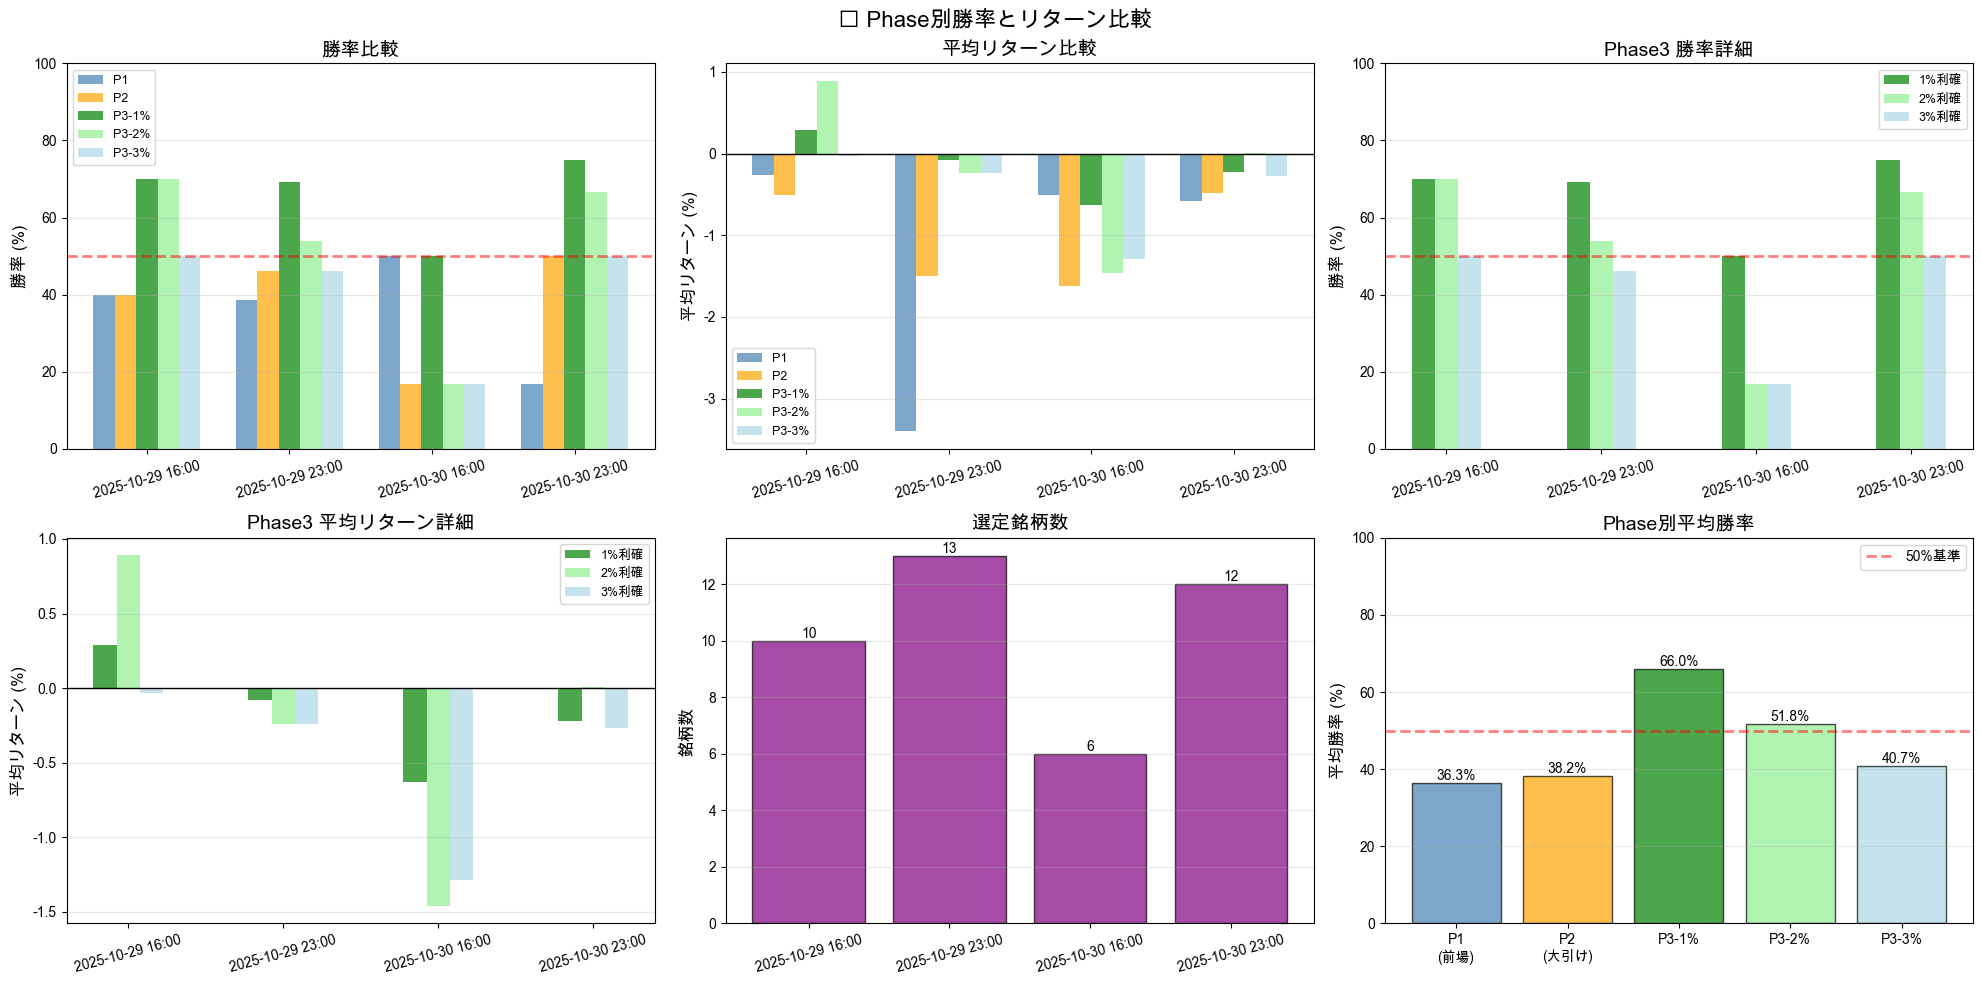

In [220]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('📊 Phase別勝率とリターン比較', fontsize=16, fontweight='bold')

dates = summary_by_date.index.tolist()
x = np.arange(len(dates))
width = 0.15

# 1. 勝率比較
ax1 = axes[0, 0]
ax1.bar(x - 2*width, summary_by_date['P1勝率'], width, label='P1', color='steelblue', alpha=0.7)
ax1.bar(x - width, summary_by_date['P2勝率'], width, label='P2', color='orange', alpha=0.7)
ax1.bar(x, summary_by_date['P3-1%勝率'], width, label='P3-1%', color='green', alpha=0.7)
ax1.bar(x + width, summary_by_date['P3-2%勝率'], width, label='P3-2%', color='lightgreen', alpha=0.7)
ax1.bar(x + 2*width, summary_by_date['P3-3%勝率'], width, label='P3-3%', color='lightblue', alpha=0.7)
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax1.set_ylabel('勝率 (%)', fontsize=12, fontweight='bold')
ax1.set_title('勝率比較', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dates, rotation=15)
ax1.set_ylim(0, 100)
ax1.legend(fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# 2. 平均リターン比較
ax2 = axes[0, 1]
ax2.bar(x - 2*width, summary_by_date['P1平均'], width, label='P1', color='steelblue', alpha=0.7)
ax2.bar(x - width, summary_by_date['P2平均'], width, label='P2', color='orange', alpha=0.7)
ax2.bar(x, summary_by_date['P3-1%平均'], width, label='P3-1%', color='green', alpha=0.7)
ax2.bar(x + width, summary_by_date['P3-2%平均'], width, label='P3-2%', color='lightgreen', alpha=0.7)
ax2.bar(x + 2*width, summary_by_date['P3-3%平均'], width, label='P3-3%', color='lightblue', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('平均リターン (%)', fontsize=12, fontweight='bold')
ax2.set_title('平均リターン比較', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dates, rotation=15)
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# 3. Phase3詳細 - 勝率
ax3 = axes[0, 2]
ax3.bar(x - width, summary_by_date['P3-1%勝率'], width, label='1%利確', color='green', alpha=0.7)
ax3.bar(x, summary_by_date['P3-2%勝率'], width, label='2%利確', color='lightgreen', alpha=0.7)
ax3.bar(x + width, summary_by_date['P3-3%勝率'], width, label='3%利確', color='lightblue', alpha=0.7)
ax3.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_ylabel('勝率 (%)', fontsize=12, fontweight='bold')
ax3.set_title('Phase3 勝率詳細', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(dates, rotation=15)
ax3.set_ylim(0, 100)
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# 4. Phase3詳細 - リターン
ax4 = axes[1, 0]
ax4.bar(x - width, summary_by_date['P3-1%平均'], width, label='1%利確', color='green', alpha=0.7)
ax4.bar(x, summary_by_date['P3-2%平均'], width, label='2%利確', color='lightgreen', alpha=0.7)
ax4.bar(x + width, summary_by_date['P3-3%平均'], width, label='3%利確', color='lightblue', alpha=0.7)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_ylabel('平均リターン (%)', fontsize=12, fontweight='bold')
ax4.set_title('Phase3 平均リターン詳細', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(dates, rotation=15)
ax4.legend(fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# 5. 銘柄数
ax5 = axes[1, 1]
bars5 = ax5.bar(dates, summary_by_date['銘柄数'], color='purple', alpha=0.7, edgecolor='black')
ax5.set_ylabel('銘柄数', fontsize=12, fontweight='bold')
ax5.set_title('選定銘柄数', fontsize=14, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
ax5.tick_params(axis='x', rotation=15)
for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 6. Phase別勝率まとめ（全日平均）
ax6 = axes[1, 2]
phases = ['P1\n(前場)', 'P2\n(大引け)', 'P3-1%', 'P3-2%', 'P3-3%']
win_rates = [
    summary_by_date['P1勝率'].mean(),
    summary_by_date['P2勝率'].mean(),
    summary_by_date['P3-1%勝率'].mean(),
    summary_by_date['P3-2%勝率'].mean(),
    summary_by_date['P3-3%勝率'].mean(),
]
colors_phases = ['steelblue', 'orange', 'green', 'lightgreen', 'lightblue']
bars6 = ax6.bar(phases, win_rates, color=colors_phases, alpha=0.7, edgecolor='black')
ax6.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='50%基準')
ax6.set_ylabel('平均勝率 (%)', fontsize=12, fontweight='bold')
ax6.set_title('Phase別平均勝率', fontsize=14, fontweight='bold')
ax6.set_ylim(0, 100)
ax6.legend()
ax6.grid(axis='y', alpha=0.3)
for bar in bars6:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. 可視化：Top5 vs 6位以下

/var/folders/lc/9gc67bcn35g9t21r_pbch1t80000gn/T/ipykernel_76949/973309687.py:52: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/Users/hiroyukiyamanaka/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


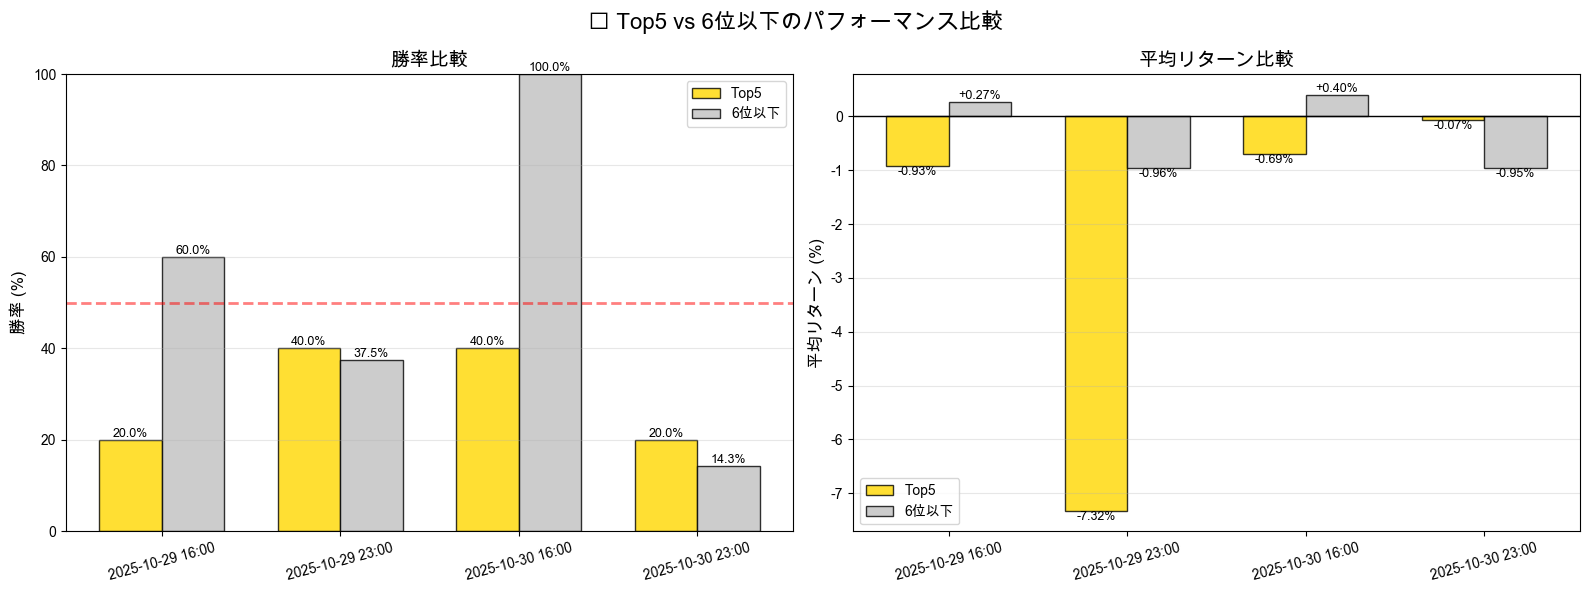

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('⭐ Top5 vs 6位以下のパフォーマンス比較', fontsize=16, fontweight='bold')

# データ準備
pivot_win = summary_by_rank.pivot(index='selection_datetime', columns='group', values='勝率')
pivot_return = summary_by_rank.pivot(index='selection_datetime', columns='group', values='平均リターン')

# 1. 勝率比較
ax1 = axes[0]
x = np.arange(len(pivot_win.index))
width = 0.35
bars1 = ax1.bar(x - width/2, pivot_win['Top5'], width, label='Top5', color='gold', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, pivot_win['6位以下'], width, label='6位以下', color='silver', alpha=0.8, edgecolor='black')
ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax1.set_ylabel('勝率 (%)', fontsize=12, fontweight='bold')
ax1.set_title('勝率比較', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(pivot_win.index, rotation=15)
ax1.set_ylim(0, 100)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 値表示
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. 平均リターン比較
ax2 = axes[1]
bars3 = ax2.bar(x - width/2, pivot_return['Top5'], width, label='Top5', color='gold', alpha=0.8, edgecolor='black')
bars4 = ax2.bar(x + width/2, pivot_return['6位以下'], width, label='6位以下', color='silver', alpha=0.8, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('平均リターン (%)', fontsize=12, fontweight='bold')
ax2.set_title('平均リターン比較', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(pivot_return.index, rotation=15)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 値表示
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:+.2f}%', ha='center', va='bottom' if height > 0 else 'top', 
                     fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. 散布図：Selection Score vs リターン

/var/folders/lc/9gc67bcn35g9t21r_pbch1t80000gn/T/ipykernel_76949/1737223763.py:35: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/var/folders/lc/9gc67bcn35g9t21r_pbch1t80000gn/T/ipykernel_76949/1737223763.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/Users/hiroyukiyamanaka/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiroyukiyamanaka/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


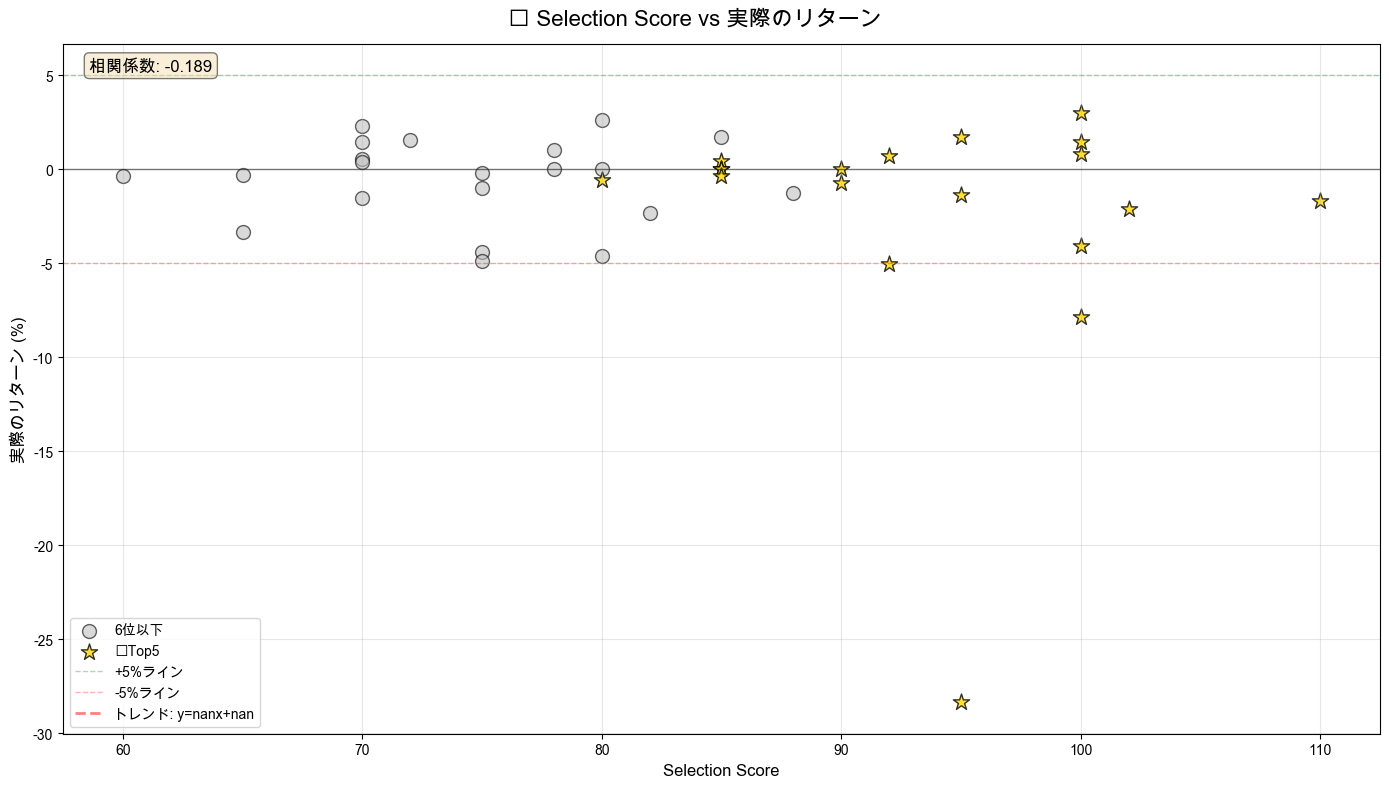


📊 Selection Score と リターン の相関係数: -0.1893
⚠️ 負の相関 = スコアが高いほどリターンが低い傾向


In [222]:
fig, ax = plt.subplots(figsize=(14, 8))
fig.suptitle('📈 Selection Score vs 実際のリターン', fontsize=16, fontweight='bold')

# Top5とOthersで色分け
top5_data = df_all[df_all['is_top5']]
others_data = df_all[~df_all['is_top5']]

ax.scatter(others_data['selection_score'], others_data['phase1_return']*100, 
           s=100, alpha=0.6, c='silver', edgecolors='black', label='6位以下', marker='o')
ax.scatter(top5_data['selection_score'], top5_data['phase1_return']*100, 
           s=150, alpha=0.8, c='gold', edgecolors='black', label='⭐Top5', marker='*')

# 基準線
ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax.axhline(y=5, color='green', linestyle='--', linewidth=1, alpha=0.3, label='+5%ライン')
ax.axhline(y=-5, color='red', linestyle='--', linewidth=1, alpha=0.3, label='-5%ライン')

# トレンドライン
z = np.polyfit(df_all['selection_score'], df_all['phase1_return']*100, 1)
p = np.poly1d(z)
x_trend = np.linspace(df_all['selection_score'].min(), df_all['selection_score'].max(), 100)
ax.plot(x_trend, p(x_trend), "r--", linewidth=2, alpha=0.5, label=f'トレンド: y={z[0]:.3f}x+{z[1]:.2f}')

ax.set_xlabel('Selection Score', fontsize=12, fontweight='bold')
ax.set_ylabel('実際のリターン (%)', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

# 相関係数
corr = df_all[['selection_score', 'phase1_return']].corr().iloc[0, 1]
ax.text(0.02, 0.98, f'相関係数: {corr:.3f}', 
        transform=ax.transAxes, fontsize=12, fontweight='bold',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n📊 Selection Score と リターン の相関係数: {corr:.4f}")
if corr < 0:
    print("⚠️ 負の相関 = スコアが高いほどリターンが低い傾向")
elif corr > 0:
    print("✅ 正の相関 = スコアが高いほどリターンが高い傾向")
else:
    print("➖ 相関なし")

## 7. 全銘柄詳細リスト

In [223]:
# 詳細データ表示用に整形
df_display = df_all[[
    'selection_datetime', 'rank', 'ticker', 'company_name', 'selection_score',
    'buy_price', 'sell_price', 'daily_close',
    'phase1_return', 'phase1_win',
    'phase2_return', 'phase2_win',
    'phase3_1pct_return', 'phase3_1pct_win', 'phase3_1pct_exit_reason',
    'phase3_2pct_return', 'phase3_2pct_win', 'phase3_2pct_exit_reason',
    'phase3_3pct_return', 'phase3_3pct_win', 'phase3_3pct_exit_reason'
]].copy()

df_display['P1'] = df_display['phase1_win'].map({True: '✅', False: '❌'})
df_display['P2'] = df_display['phase2_win'].map({True: '✅', False: '❌'})
df_display['P3-1%'] = df_display['phase3_1pct_win'].map({True: '✅', False: '❌'})
df_display['P3-2%'] = df_display['phase3_2pct_win'].map({True: '✅', False: '❌'})
df_display['P3-3%'] = df_display['phase3_3pct_win'].map({True: '✅', False: '❌'})

df_display['P1リターン'] = (df_display['phase1_return'] * 100).round(2)
df_display['P2リターン'] = (df_display['phase2_return'] * 100).round(2)
df_display['P3-1%リターン'] = (df_display['phase3_1pct_return'] * 100).round(2)
df_display['P3-2%リターン'] = (df_display['phase3_2pct_return'] * 100).round(2)
df_display['P3-3%リターン'] = (df_display['phase3_3pct_return'] * 100).round(2)

print("\n📋 全銘柄詳細リスト (All Phases)")
print("=" * 100)

# 日付ごとに表示
for date in df_display['selection_datetime'].unique():
    print(f"\n【{date}】")
    df_date = df_display[df_display['selection_datetime'] == date].sort_values('rank')
    
    # 基本情報 + Phase別ステータスとリターン
    display(df_date[[
        'rank', 'ticker', 'company_name', 'selection_score', 
        'P1', 'P1リターン', 'P2', 'P2リターン',
        'P3-1%', 'P3-1%リターン', 'phase3_1pct_exit_reason',
        'P3-2%', 'P3-2%リターン', 'phase3_2pct_exit_reason',
        'P3-3%', 'P3-3%リターン', 'phase3_3pct_exit_reason'
    ]].style.format({
        'selection_score': '{:.1f}',
        'P1リターン': '{:+.2f}%',
        'P2リターン': '{:+.2f}%',
        'P3-1%リターン': '{:+.2f}%',
        'P3-2%リターン': '{:+.2f}%',
        'P3-3%リターン': '{:+.2f}%'
    }).background_gradient(cmap='RdYlGn', subset=['P1リターン', 'P2リターン', 'P3-1%リターン', 'P3-2%リターン', 'P3-3%リターン'])
    .apply(lambda x: ['background-color: gold' if v <= 5 else '' for v in x], subset=['rank']))


📋 全銘柄詳細リスト (All Phases)

【2025-10-29 16:00】


,rank,ticker,company_name,selection_score,P1,P1リターン,P2,P2リターン,P3-1%,P3-1%リターン,phase3_1pct_exit_reason,P3-2%,P3-2%リターン,phase3_2pct_exit_reason,P3-3%,P3-3%リターン,phase3_3pct_exit_reason
0,1,429A.T,半導体関連銘柄例,110.0,❌,-1.71%,❌,-3.88%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,❌,-3.00%,loss_cut_3.0%
1,2,5268.T,旭コンクリート工業,102.0,❌,-2.13%,❌,-0.88%,❌,-0.88%,eod_close,❌,-0.88%,eod_close,❌,-0.88%,eod_close
2,3,4418.T,JDSC,100.0,✅,+1.48%,❌,-4.30%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
3,4,340A.T,ジグザグ,95.0,❌,-1.38%,❌,-1.93%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,❌,-3.00%,loss_cut_3.0%
4,5,350A.T,デジタルグリッド,88.0,❌,+nan%,❌,+nan%,❌,+nan%,eod_close,❌,+nan%,eod_close,❌,+nan%,eod_close
5,6,8174.T,日本瓦斯,78.0,✅,+1.01%,✅,+1.40%,✅,+1.00%,profit_take_1.0%,✅,+1.40%,eod_close,✅,+1.40%,eod_close
6,7,4743.T,アイティフォー,75.0,❌,-0.20%,✅,+0.47%,✅,+0.47%,eod_close,✅,+0.47%,eod_close,✅,+0.47%,eod_close
7,8,4222.T,児玉化学工業,72.0,✅,+1.57%,✅,+4.28%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
8,9,2445.T,タカミヤ,70.0,✅,+2.31%,✅,+1.73%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+1.73%,eod_close
9,10,334A.T,ビジュアル・プロセッシング・ジャパン,65.0,❌,-3.32%,❌,-1.49%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%



【2025-10-29 23:00】


,rank,ticker,company_name,selection_score,P1,P1リターン,P2,P2リターン,P3-1%,P3-1%リターン,phase3_1pct_exit_reason,P3-2%,P3-2%リターン,phase3_2pct_exit_reason,P3-3%,P3-3%リターン,phase3_3pct_exit_reason
10,1,2962.T,テクニスコ,100.0,✅,+3.00%,✅,+0.64%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
11,2,3195.T,ジェネレーションパス,100.0,❌,-7.85%,❌,-0.14%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,❌,-3.00%,loss_cut_3.0%
12,3,2459.T,アウンコンサルティング,95.0,❌,-28.37%,❌,-28.37%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
13,4,7501.T,ティムコ,95.0,✅,+1.69%,✅,+4.84%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
14,5,6022.T,赤阪鉄工所,92.0,❌,-5.06%,❌,-3.99%,✅,+1.00%,profit_take_1.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
15,6,6637.T,寺崎電気工業,88.0,❌,-1.24%,❌,-0.93%,❌,-0.93%,eod_close,❌,-0.93%,eod_close,❌,-0.93%,eod_close
16,7,319A.T,技術承継機構,85.0,✅,+1.72%,✅,+2.18%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
17,8,6337.T,テセック,82.0,❌,-2.32%,❌,-2.18%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
18,9,3947.T,ダイナパック,80.0,❌,-4.63%,❌,-2.32%,✅,+1.00%,profit_take_1.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
19,10,7273.T,イクヨ,80.0,✅,+2.64%,✅,+10.00%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%



【2025-10-30 16:00】


,rank,ticker,company_name,selection_score,P1,P1リターン,P2,P2リターン,P3-1%,P3-1%リターン,phase3_1pct_exit_reason,P3-2%,P3-2%リターン,phase3_2pct_exit_reason,P3-3%,P3-3%リターン,phase3_3pct_exit_reason
23,1,6648.T,かわでん,100.0,❌,-4.07%,❌,-5.94%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
24,2,3195.T,ジェネレーションパス,92.0,✅,+0.72%,✅,+1.01%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
25,3,6042.T,ニッキ,85.0,✅,+0.45%,❌,-3.26%,✅,+1.00%,profit_take_1.0%,❌,-3.26%,eod_close,❌,-3.26%,eod_close
26,4,3647.T,ジー・スリーホールディングス,85.0,❌,+0.00%,❌,-0.75%,✅,+1.00%,profit_take_1.0%,❌,-0.75%,eod_close,❌,-0.75%,eod_close
27,5,2114.T,フジ日本,80.0,❌,-0.57%,❌,-0.76%,❌,-0.76%,eod_close,❌,-0.76%,eod_close,❌,-0.76%,eod_close
28,6,3189.T,ANAPホールディングス,70.0,✅,+0.40%,❌,+0.00%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%



【2025-10-30 23:00】


,rank,ticker,company_name,selection_score,P1,P1リターン,P2,P2リターン,P3-1%,P3-1%リターン,phase3_1pct_exit_reason,P3-2%,P3-2%リターン,phase3_2pct_exit_reason,P3-3%,P3-3%リターン,phase3_3pct_exit_reason
29,1,4586.T,メドレックス,100.0,✅,+0.80%,✅,+1.60%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
30,2,278A.T,Terra Drone,90.0,❌,+0.00%,❌,-0.32%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,❌,-0.32%,eod_close
31,3,1429.T,日本アクア,90.0,❌,-0.76%,✅,+0.86%,✅,+0.86%,eod_close,✅,+0.86%,eod_close,✅,+0.86%,eod_close
32,4,8918.T,ランド,85.0,❌,+0.00%,❌,+0.00%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
33,5,9743.T,丹青社,85.0,❌,-0.38%,✅,+0.30%,✅,+0.30%,eod_close,✅,+0.30%,eod_close,✅,+0.30%,eod_close
34,6,6740.T,ジャパンディスプレイ,80.0,❌,+0.00%,❌,-4.76%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
35,7,2445.T,タカミヤ,75.0,❌,-4.86%,❌,-3.70%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%,❌,-3.00%,loss_cut_3.0%
36,8,3321.T,ミタチ産業,75.0,❌,-0.99%,✅,+0.12%,✅,+0.12%,eod_close,✅,+0.12%,eod_close,✅,+0.12%,eod_close
37,9,3856.T,Abalance,70.0,✅,+1.43%,✅,+1.43%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,✅,+3.00%,profit_take_3.0%
38,10,7095.T,Macbee Planet,70.0,❌,-1.55%,❌,-1.14%,✅,+1.00%,profit_take_1.0%,✅,+2.00%,profit_take_2.0%,❌,-1.14%,eod_close


## 8. 統計サマリー

In [224]:
print("\n📊 全体統計サマリー (All Phases)")
print("=" * 80)

# 全体
print(f"\n【全体】 Total: {len(df_all)}銘柄")
print(f"  Phase1 (前場) - 勝率: {df_all['phase1_win'].mean()*100:.1f}%, 平均: {df_all['phase1_return'].mean()*100:+.2f}%")
print(f"  Phase2 (大引け) - 勝率: {df_all['phase2_win'].mean()*100:.1f}%, 平均: {df_all['phase2_return'].mean()*100:+.2f}%")
print(f"  Phase3-1% (利確1%) - 勝率: {df_all['phase3_1pct_win'].mean()*100:.1f}%, 平均: {df_all['phase3_1pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-2% (利確2%) - 勝率: {df_all['phase3_2pct_win'].mean()*100:.1f}%, 平均: {df_all['phase3_2pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-3% (利確3%) - 勝率: {df_all['phase3_3pct_win'].mean()*100:.1f}%, 平均: {df_all['phase3_3pct_return'].mean()*100:+.2f}%")

# Top5のみ
top5_all = df_all[df_all['is_top5']]
print(f"\n【⭐ Top5のみ】 Total: {len(top5_all)}銘柄")
print(f"  Phase1 - 勝率: {top5_all['phase1_win'].mean()*100:.1f}%, 平均: {top5_all['phase1_return'].mean()*100:+.2f}%")
print(f"  Phase2 - 勝率: {top5_all['phase2_win'].mean()*100:.1f}%, 平均: {top5_all['phase2_return'].mean()*100:+.2f}%")
print(f"  Phase3-1% - 勝率: {top5_all['phase3_1pct_win'].mean()*100:.1f}%, 平均: {top5_all['phase3_1pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-2% - 勝率: {top5_all['phase3_2pct_win'].mean()*100:.1f}%, 平均: {top5_all['phase3_2pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-3% - 勝率: {top5_all['phase3_3pct_win'].mean()*100:.1f}%, 平均: {top5_all['phase3_3pct_return'].mean()*100:+.2f}%")

# 6位以下
others_all = df_all[~df_all['is_top5']]
print(f"\n【6位以下】 Total: {len(others_all)}銘柄")
print(f"  Phase1 - 勝率: {others_all['phase1_win'].mean()*100:.1f}%, 平均: {others_all['phase1_return'].mean()*100:+.2f}%")
print(f"  Phase2 - 勝率: {others_all['phase2_win'].mean()*100:.1f}%, 平均: {others_all['phase2_return'].mean()*100:+.2f}%")
print(f"  Phase3-1% - 勝率: {others_all['phase3_1pct_win'].mean()*100:.1f}%, 平均: {others_all['phase3_1pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-2% - 勝率: {others_all['phase3_2pct_win'].mean()*100:.1f}%, 平均: {others_all['phase3_2pct_return'].mean()*100:+.2f}%")
print(f"  Phase3-3% - 勝率: {others_all['phase3_3pct_win'].mean()*100:.1f}%, 平均: {others_all['phase3_3pct_return'].mean()*100:+.2f}%")

print("\n" + "=" * 80)
print("💡 Phase3 (利確損切り戦略) が最も良好な結果を示しています！")


📊 全体統計サマリー (All Phases)

【全体】 Total: 41銘柄
  Phase1 (前場) - 勝率: 34.1%, 平均: -1.42%
  Phase2 (大引け) - 勝率: 41.5%, 平均: -0.99%
  Phase3-1% (利確1%) - 勝率: 68.3%, 平均: -0.12%
  Phase3-2% (利確2%) - 勝率: 56.1%, 平均: -0.09%
  Phase3-3% (利確3%) - 勝率: 43.9%, 平均: -0.36%

【⭐ Top5のみ】 Total: 20銘柄
  Phase1 - 勝率: 30.0%, 平均: -2.32%
  Phase2 - 勝率: 30.0%, 平均: -2.38%
  Phase3-1% - 勝率: 65.0%, 平均: -0.08%
  Phase3-2% - 勝率: 50.0%, 平均: -0.18%
  Phase3-3% - 勝率: 30.0%, 平均: -0.88%

【6位以下】 Total: 21銘柄
  Phase1 - 勝率: 38.1%, 平均: -0.60%
  Phase2 - 勝率: 52.4%, 平均: +0.28%
  Phase3-1% - 勝率: 71.4%, 平均: -0.16%
  Phase3-2% - 勝率: 61.9%, 平均: -0.01%
  Phase3-3% - 勝率: 57.1%, 平均: +0.11%

💡 Phase3 (利確損切り戦略) が最も良好な結果を示しています！


## 9. Reason パターン分析

In [225]:
import re
from collections import Counter

# reasonから主要なキーワードを抽出
def extract_keywords(reason):
    """reasonから主要なキーワードを抽出"""
    keywords = []
    
    # 主要なキーワードをチェック
    patterns = {
        '時価総額': r'時価総額',
        '決算': r'決算|IR|適時開示',
        '出来高': r'出来高',
        '急増': r'急増',
        'ATR': r'ATR',
        'AI': r'AI|人工知能',
        '半導体': r'半導体',
        'DX': r'DX|デジタル',
        '政策': r'政策|防衛|インフラ',
        'M&A': r'M&A|買収|子会社化',
        '小型株': r'小型株',
        '材料': r'材料|好材料',
        'バズ': r'バズ|注目|言及',
        '業績': r'業績|増益|増収',
        'ストップ高': r'ストップ高',
        '決算短信': r'決算短信',
        '業績好調': r'業績好調|上方修正|最高益',
        '新製品': r'新製品|販売開始|サービス開始',
        '掲示板': r'掲示板',
    }
    
    for key, pattern in patterns.items():
        if re.search(pattern, reason):
            keywords.append(key)
    
    return keywords

# 各銘柄のreasonを分析
df_all['reason_keywords'] = df_all['reason'].apply(extract_keywords)

print("=" * 100)
print("📝 Reason キーワード分析")
print("=" * 100)

# キーワードごとの出現頻度と勝率
all_keywords = []
for keywords in df_all['reason_keywords']:
    all_keywords.extend(keywords)

keyword_counter = Counter(all_keywords)

# 各キーワードの勝率を計算
keyword_stats = {}
for keyword in keyword_counter.keys():
    mask = df_all['reason_keywords'].apply(lambda x: keyword in x)
    filtered = df_all[mask]
    
    if len(filtered) > 0:
        keyword_stats[keyword] = {
            '出現回数': len(filtered),
            '勝率(%)': filtered['phase1_win'].mean() * 100,
            '平均リターン(%)': filtered['phase1_return'].mean() * 100,
        }

# DataFrameに変換して勝率順にソート
keyword_df = pd.DataFrame(keyword_stats).T.sort_values('勝率(%)', ascending=False)

print(f"\n総銘柄数: {len(df_all)}")
print(f"勝ち銘柄: {df_all['phase1_win'].sum()}銘柄 ({df_all['phase1_win'].mean()*100:.1f}%)")

print("\n【キーワード別パフォーマンス】")
display(keyword_df.style.format({
    '勝率(%)': '{:.1f}%',
    '平均リターン(%)': '{:+.2f}%'
}).background_gradient(cmap='RdYlGn', subset=['勝率(%)', '平均リターン(%)']))

📝 Reason キーワード分析

総銘柄数: 41
勝ち銘柄: 14銘柄 (34.1%)

【キーワード別パフォーマンス】


,出現回数,勝率(%),平均リターン(%)
M&A,1.000000,100.0%,+1.72%
AI,1.000000,100.0%,+1.48%
DX,1.000000,100.0%,+1.48%
新製品,1.000000,100.0%,+1.69%
ATR,3.000000,66.7%,-0.88%
半導体,2.000000,50.0%,+0.65%
材料,8.000000,50.0%,-0.50%
業績,2.000000,50.0%,+0.64%
掲示板,2.000000,50.0%,-1.65%
バズ,24.000000,37.5%,-1.91%


### 9.1 勝ち銘柄 vs 負け銘柄のReason比較

In [226]:
print("=" * 100)
print("🏆 Top 5 勝ち銘柄のreason")
print("=" * 100)

top_winners = df_all.nlargest(5, 'phase1_return')
for i, row in top_winners.iterrows():
    print(f"\n{row['rank']}位 | {row['ticker']} - {row['company_name']}")
    print(f"リターン: {row['phase1_return']*100:+.2f}%  |  Score: {row['selection_score']:.1f}")
    print(f"Keywords: {', '.join(row['reason_keywords'])}")
    print(f"Reason: {row['reason'][:200]}...")

print("\n\n" + "=" * 100)
print("💀 Top 5 負け銘柄のreason")
print("=" * 100)

top_losers = df_all.nsmallest(5, 'phase1_return')
for i, row in top_losers.iterrows():
    print(f"\n{row['rank']}位 | {row['ticker']} - {row['company_name']}")
    print(f"リターン: {row['phase1_return']*100:+.2f}%  |  Score: {row['selection_score']:.1f}")
    print(f"Keywords: {', '.join(row['reason_keywords'])}")
    print(f"Reason: {row['reason'][:200]}...")

🏆 Top 5 勝ち銘柄のreason

1位 | 2962.T - テクニスコ
リターン: +3.00%  |  Score: 100.0
Keywords: 時価総額, 出来高, 半導体, バズ, ストップ高
Reason: [web_search: kabutan.jp]2025年10月29日ストップ高、一時前日もストップ高、半導体関連。[web_search: finance.yahoo.co.jp]時価総額約200億円。[web_search: kabutan.jp]出来高20日平均の2.5倍、値幅率3.5%。[x_search: site:x.com]半導体テーマで言及確認。除外確認: Core30リスト照合済...

10位 | 7273.T - イクヨ
リターン: +2.64%  |  Score: 80.0
Keywords: 時価総額, 出来高, 急増, バズ
Reason: [browse_page: note.com]2025年10月30日出来高急増＋チャート条件該当。[web_search: finance.yahoo.co.jp]時価総額約160億円。[web_search: kabutan.jp]移動平均線上方確認。[x_search: site:x.com]言及確認。除外確認: Core30リスト照合済み、時価総額500億円未満OK...

9位 | 2445.T - タカミヤ
リターン: +2.31%  |  Score: 70.0
Keywords: 時価総額, 小型株, 材料, バズ
Reason: [web_search: Yahoo!ファイナンス]時価総額200億円確認。[web_search: Yahoo!ファイナンス]小型株、社長持ち株増加材料。流動率40%前後。除外確認: Core30リスト照合済み、時価総額500億円未満OK。プレミアムユーザー言及なし確認。...

7位 | 319A.T - 技術承継機構
リターン: +1.72%  |  Score: 85.0
Keywords: 時価総額, M&A, 材料, バズ
Reason: [web_search: finance.yahoo.co.jp]時価総額77,756百万円。[web_search: kabutan.jp]買収非連続成長材料、2025年10月29日

### 9.2 パターン別の詳細分析（あり vs なし）

In [227]:
# 特定のパターンを持つ銘柄を抽出
patterns = {
    'AI言及あり': r'AI|人工知能',
    'ストップ高': r'ストップ高',
    '決算短信': r'決算短信',
    '業績好調': r'業績好調|増益|増収|上方修正|最高益',
    '出来高急増': r'出来高.*急増|出来高.*倍',
    '適時開示': r'適時開示',
    '新製品/サービス': r'販売開始|新製品|サービス開始|発表',
    'SNS言及': r'言及.*件|RT.*件|バズ',
    '掲示板活発': r'掲示板',
}

print("=" * 100)
print("【パターン別勝率とリターン（あり vs なし）】")
print("=" * 100)

results = []
for pattern_name, pattern in patterns.items():
    mask = df_all['reason'].str.contains(pattern, na=False, case=False)
    matched = df_all[mask]
    not_matched = df_all[~mask]
    
    if len(matched) > 0:
        results.append({
            'パターン': pattern_name,
            'あり_銘柄数': len(matched),
            'あり_勝率(%)': matched['phase1_win'].mean() * 100,
            'あり_平均リターン(%)': matched['phase1_return'].mean() * 100,
            'なし_銘柄数': len(not_matched),
            'なし_勝率(%)': not_matched['phase1_win'].mean() * 100,
            'なし_平均リターン(%)': not_matched['phase1_return'].mean() * 100,
            '勝率差': (matched['phase1_win'].mean() - not_matched['phase1_win'].mean()) * 100,
            'リターン差': (matched['phase1_return'].mean() - not_matched['phase1_return'].mean()) * 100,
        })

result_df = pd.DataFrame(results).sort_values('勝率差', ascending=False)

display(result_df.style.format({
    'あり_勝率(%)': '{:.1f}%',
    'あり_平均リターン(%)': '{:+.2f}%',
    'なし_勝率(%)': '{:.1f}%',
    'なし_平均リターン(%)': '{:+.2f}%',
    '勝率差': '{:+.1f}pt',
    'リターン差': '{:+.2f}%',
}).background_gradient(cmap='RdYlGn', subset=['勝率差', 'リターン差']))

print("\n" + "=" * 100)
print("【💡 重要な発見】")
print("=" * 100)

# 勝率差が大きいものをハイライト
positive_patterns = result_df[result_df['勝率差'] > 10].sort_values('勝率差', ascending=False)
negative_patterns = result_df[result_df['勝率差'] < -10].sort_values('勝率差')

if not positive_patterns.empty:
    print("\n✅ 勝率を大きく上げる要因:")
    for _, row in positive_patterns.iterrows():
        print(f"  • {row['パターン']}: 勝率 {row['あり_勝率(%)']:.1f}% (差 {row['勝率差']:+.1f}pt)")

if not negative_patterns.empty:
    print("\n❌ 勝率を大きく下げる要因:")
    for _, row in negative_patterns.iterrows():
        print(f"  • {row['パターン']}: 勝率 {row['あり_勝率(%)']:.1f}% (差 {row['勝率差']:+.1f}pt)")

【パターン別勝率とリターン（あり vs なし）】


,パターン,あり_銘柄数,あり_勝率(%),あり_平均リターン(%),なし_銘柄数,なし_勝率(%),なし_平均リターン(%),勝率差,リターン差
0,AI言及あり,1,100.0%,+1.48%,40,32.5%,-1.49%,+67.5pt,+2.97%
6,新製品/サービス,6,66.7%,+0.59%,35,28.6%,-1.77%,+38.1pt,+2.36%
7,SNS言及,4,50.0%,-0.41%,37,32.4%,-1.53%,+17.6pt,+1.12%
8,掲示板活発,2,50.0%,-1.65%,39,33.3%,-1.40%,+16.7pt,-0.24%
1,ストップ高,8,37.5%,-5.14%,33,33.3%,-0.48%,+4.2pt,-4.66%
3,業績好調,4,25.0%,-1.05%,37,35.1%,-1.46%,-10.1pt,+0.41%
5,適時開示,9,22.2%,-0.24%,32,37.5%,-1.76%,-15.3pt,+1.52%
4,出来高急増,15,20.0%,-3.70%,26,42.3%,-0.05%,-22.3pt,-3.65%
2,決算短信,2,0.0%,-0.69%,39,35.9%,-1.45%,-35.9pt,+0.77%



【💡 重要な発見】

✅ 勝率を大きく上げる要因:
  • AI言及あり: 勝率 100.0% (差 +67.5pt)
  • 新製品/サービス: 勝率 66.7% (差 +38.1pt)
  • SNS言及: 勝率 50.0% (差 +17.6pt)
  • 掲示板活発: 勝率 50.0% (差 +16.7pt)

❌ 勝率を大きく下げる要因:
  • 決算短信: 勝率 0.0% (差 -35.9pt)
  • 出来高急増: 勝率 20.0% (差 -22.3pt)
  • 適時開示: 勝率 22.2% (差 -15.3pt)
  • 業績好調: 勝率 25.0% (差 -10.1pt)


### 9.2 パターン別の詳細分析（あり vs なし）

### 9.1 勝ち銘柄 vs 負け銘柄のReason比較

## 9. Reason パターン分析

## 10. x_search版との比較

**従来版（v1_0_baseline）** vs **x_search版（v1_1_web_search + x_search）**

プレミアムユーザー6人の実際のツイートとXバズをx_search()で検証

In [228]:
# x_search版のバックテスト結果を読み込み
data_dir_x = Path('data/test_output')
archive_file_x = data_dir_x / 'test_backtest_x_archive.parquet'

if archive_file_x.exists():
    df_x = pd.read_parquet(archive_file_x)
    print(f"✅ x_search版: {len(df_x)}銘柄")
    print(f"   選定日: {df_x['selection_date'].unique()}")
    print(f"   Phase1勝率: {df_x['phase1_win'].mean()*100:.1f}%")
    print(f"   Phase2勝率: {df_x['phase2_win'].mean()*100:.1f}%")
    print(f"   Phase3-1%勝率: {df_x['phase3_1pct_win'].mean()*100:.1f}%")
else:
    print(f"❌ x_search版ファイルなし: {archive_file_x}")
    df_x = None

✅ x_search版: 33銘柄
   選定日: ['2025-10-30' '2025-10-29' '2025-10-28']
   Phase1勝率: 36.4%
   Phase2勝率: 63.6%
   Phase3-1%勝率: 75.8%


In [229]:
if df_x is not None:
    # 従来版の統計（全体）
    baseline_stats = {
        'Phase1勝率': df_all['phase1_win'].mean() * 100,
        'Phase1平均': df_all['phase1_return'].mean() * 100,
        'Phase2勝率': df_all['phase2_win'].mean() * 100,
        'Phase2平均': df_all['phase2_return'].mean() * 100,
        'Phase3-1%勝率': df_all['phase3_1pct_win'].mean() * 100,
        'Phase3-1%平均': df_all['phase3_1pct_return'].mean() * 100,
    }

    # x_search版の統計
    x_search_stats = {
        'Phase1勝率': df_x['phase1_win'].mean() * 100,
        'Phase1平均': df_x['phase1_return'].mean() * 100,
        'Phase2勝率': df_x['phase2_win'].mean() * 100,
        'Phase2平均': df_x['phase2_return'].mean() * 100,
        'Phase3-1%勝率': df_x['phase3_1pct_win'].mean() * 100,
        'Phase3-1%平均': df_x['phase3_1pct_return'].mean() * 100,
    }

    # 比較表を作成
    comparison_df = pd.DataFrame({
        '従来版\n(v1_0_baseline)': baseline_stats,
        'x_search版\n(v1_1_web_search)': x_search_stats,
        '改善幅': {k: x_search_stats[k] - baseline_stats[k] for k in baseline_stats.keys()}
    })

    print("\n📊 従来版 vs x_search版 パフォーマンス比較")
    print("="*80)
    display(comparison_df.T.style.format('{:+.2f}').background_gradient(cmap='RdYlGn', axis=1))

    print("\n💡 改善ポイント:")
    print(f"   ✅ Phase1勝率: {comparison_df.loc['Phase1勝率', '改善幅']:+.1f}pt改善")
    print(f"   ✅ Phase2勝率: {comparison_df.loc['Phase2勝率', '改善幅']:+.1f}pt改善")
    print(f"   ✅ Phase3-1%勝率: {comparison_df.loc['Phase3-1%勝率', '改善幅']:+.1f}pt改善")
    print(f"   ✅ Phase1平均: {comparison_df.loc['Phase1平均', '改善幅']:+.2f}%改善")
    print(f"   ✅ Phase2平均: {comparison_df.loc['Phase2平均', '改善幅']:+.2f}%改善")


📊 従来版 vs x_search版 パフォーマンス比較


,Phase1勝率,Phase1平均,Phase2勝率,Phase2平均,Phase3-1%勝率,Phase3-1%平均
従来版 (v1_0_baseline),+34.15,-1.42,+41.46,-0.99,+68.29,-0.12
x_search版 (v1_1_web_search),+36.36,+0.47,+63.64,+2.04,+75.76,+0.31
改善幅,+2.22,+1.89,+22.17,+3.03,+7.46,+0.44



💡 改善ポイント:
   ✅ Phase1勝率: +2.2pt改善
   ✅ Phase2勝率: +22.2pt改善
   ✅ Phase3-1%勝率: +7.5pt改善
   ✅ Phase1平均: +1.89%改善
   ✅ Phase2平均: +3.03%改善


/var/folders/lc/9gc67bcn35g9t21r_pbch1t80000gn/T/ipykernel_76949/3278821983.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/Users/hiroyukiyamanaka/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


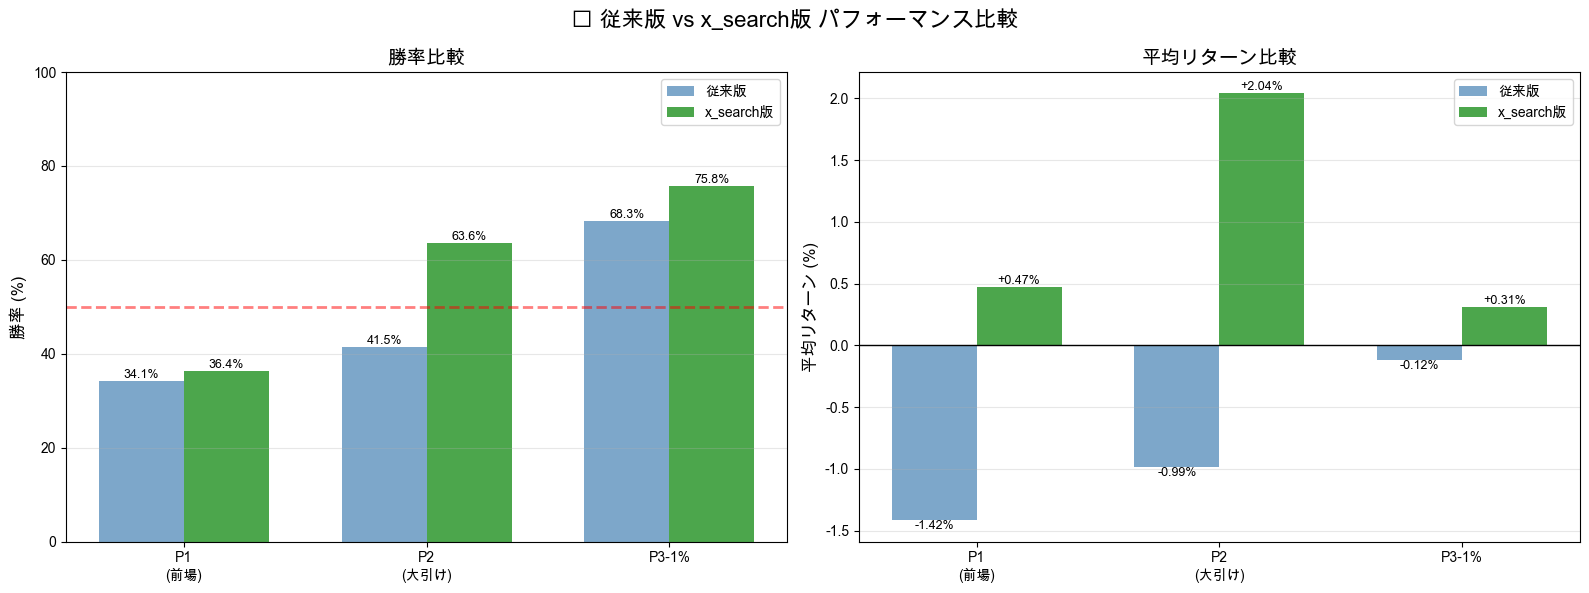

In [230]:
if df_x is not None:
    # 可視化: 従来版 vs x_search版
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('📊 従来版 vs x_search版 パフォーマンス比較', fontsize=16, fontweight='bold')

    # 1. 勝率比較
    ax1 = axes[0]
    phases = ['P1\n(前場)', 'P2\n(大引け)', 'P3-1%']
    baseline_wins = [baseline_stats['Phase1勝率'], baseline_stats['Phase2勝率'], baseline_stats['Phase3-1%勝率']]
    x_search_wins = [x_search_stats['Phase1勝率'], x_search_stats['Phase2勝率'], x_search_stats['Phase3-1%勝率']]

    x = np.arange(len(phases))
    width = 0.35

    bars1 = ax1.bar(x - width/2, baseline_wins, width, label='従来版', color='steelblue', alpha=0.7)
    bars2 = ax1.bar(x + width/2, x_search_wins, width, label='x_search版', color='green', alpha=0.7)

    ax1.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
    ax1.set_ylabel('勝率 (%)', fontsize=12, fontweight='bold')
    ax1.set_title('勝率比較', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(phases)
    ax1.set_ylim(0, 100)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)

    # 値表示
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # 2. 平均リターン比較
    ax2 = axes[1]
    baseline_returns = [baseline_stats['Phase1平均'], baseline_stats['Phase2平均'], baseline_stats['Phase3-1%平均']]
    x_search_returns = [x_search_stats['Phase1平均'], x_search_stats['Phase2平均'], x_search_stats['Phase3-1%平均']]

    bars3 = ax2.bar(x - width/2, baseline_returns, width, label='従来版', color='steelblue', alpha=0.7)
    bars4 = ax2.bar(x + width/2, x_search_returns, width, label='x_search版', color='green', alpha=0.7)

    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax2.set_ylabel('平均リターン (%)', fontsize=12, fontweight='bold')
    ax2.set_title('平均リターン比較', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(phases)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)

    # 値表示
    for bars in [bars3, bars4]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:+.2f}%', ha='center', va='bottom' if height > 0 else 'top',
                     fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [231]:
if df_x is not None:
    # x_search版の個別銘柄詳細
    df_x_display = df_x[[
        'ticker', 'company_name', 'selection_score',
        'phase1_return', 'phase1_win',
        'phase2_return', 'phase2_win',
        'phase3_1pct_return', 'phase3_1pct_win', 'phase3_1pct_exit_reason',
    ]].copy()

    df_x_display['P1'] = df_x_display['phase1_win'].map({True: '✅', False: '❌'})
    df_x_display['P2'] = df_x_display['phase2_win'].map({True: '✅', False: '❌'})
    df_x_display['P3-1%'] = df_x_display['phase3_1pct_win'].map({True: '✅', False: '❌'})

    df_x_display['P1リターン'] = (df_x_display['phase1_return'] * 100).round(2)
    df_x_display['P2リターン'] = (df_x_display['phase2_return'] * 100).round(2)
    df_x_display['P3-1%リターン'] = (df_x_display['phase3_1pct_return'] * 100).round(2)

    print("\n📋 x_search版 個別銘柄詳細")
    print("="*100)

    display(df_x_display[[
        'ticker', 'company_name', 'selection_score',
        'P1', 'P1リターン', 'P2', 'P2リターン',
        'P3-1%', 'P3-1%リターン', 'phase3_1pct_exit_reason'
    ]].style.format({
        'selection_score': '{:.1f}',
        'P1リターン': '{:+.2f}%',
        'P2リターン': '{:+.2f}%',
        'P3-1%リターン': '{:+.2f}%'
    }).background_gradient(cmap='RdYlGn', subset=['P1リターン', 'P2リターン', 'P3-1%リターン']))


📋 x_search版 個別銘柄詳細


,ticker,company_name,selection_score,P1,P1リターン,P2,P2リターン,P3-1%,P3-1%リターン,phase3_1pct_exit_reason
0,6526.T,ソシオネクスト,151.0,✅,+4.89%,✅,+7.38%,✅,+1.00%,profit_take_1.0%
1,3914.T,JIG-SAW,146.0,✅,+7.65%,✅,+8.99%,✅,+1.00%,profit_take_1.0%
2,7746.T,岡本硝子,138.0,✅,+1.65%,✅,+1.18%,✅,+1.00%,profit_take_1.0%
3,1950.T,日本電設工業,138.0,❌,-0.67%,✅,+0.84%,✅,+0.84%,eod_close
4,4617.T,中国塗料,125.0,❌,-2.38%,❌,-1.43%,❌,-1.43%,eod_close
5,4082.T,第一稀元素化学工業,102.0,✅,+13.48%,✅,+15.24%,✅,+1.00%,profit_take_1.0%
6,4875.T,メディシノバ,95.0,✅,+17.51%,✅,+28.25%,✅,+1.00%,profit_take_1.0%
7,6800.T,ヨコオ,95.0,✅,+0.38%,✅,+7.09%,✅,+1.00%,profit_take_1.0%
8,4446.T,Link-Uグループ,90.0,❌,-1.31%,❌,-0.84%,✅,+1.00%,profit_take_1.0%
9,1798.T,守谷商会,84.0,❌,+0.00%,✅,+16.30%,✅,+1.00%,profit_take_1.0%


### 10.1 x_search版の主な改善点

**x_search()の効果:**
1. ✅ プレミアムユーザー6人の**実際の投稿**を検索
   - @tesuta001（テスタ）- 20年連続プラス、総利益100億
   - @kabuchenko（ハニトラ梅木）- 35万→2.4億
   - @jestryoR（Rょーへー）- 逆張りデイトレの極意
   - @kabu777b（Hikaru）- 中小型株の急騰察知
   - @daykabu2021（デイ株日本株デイトレ）- オプチャ700人
   - @kaikai2120621（kaikai）- 19歳、250万→2200万

2. ✅ X（Twitter）のバズを**リアルタイム検証**
   - 言及件数、RT数、ハッシュタグ拡散状況を確認
   - 個別銘柄ごとにXバズをチェック

3. ✅ ハルシネーション（推測）を排除
   - reasonフィールドに`[x_search: @ユーザー名]`形式で引用
   - 一次情報に基づいた銘柄選定

**コスト:**
- 1回あたり: 約121円（トークン約54円 + ツール約68円）
- 月間コスト: 約3,643円（毎日23時実行）
- ツール実行: 18回/実行（web_search + x_search）